In [1]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Read dataset0.json.gz file

objs = []

with gzip.open("dataset0.json.gz", 'rt') as f:
            for line in f:
               objs.append(json.loads(line))

In [2]:
# Read data.info table
data = pd.read_csv("data.info")
data = pd.DataFrame(data)


rows = []
for i in range(len(objs)):
    for transcript_id, inner_dict in objs[i].items():
        for position, inner_list in inner_dict.items():
            for necleotides, sublist in inner_list.items():
                for subsublist in sublist:
                    rows.append([transcript_id, position, necleotides] + subsublist)


df = pd.DataFrame(rows, columns=["transcript_id", "transcript_position", "combined nucleotides", "dwelling_time1", "sd1", "mean1", "dwelling_time2", "sd2", "mean2", "dwelling_time3", "sd3", "mean3"])

df['transcript_position'] = df['transcript_position'].astype(int)
data['transcript_position'] = data['transcript_position'].astype(int)

df = pd.merge(df, data, on=['transcript_id', 'transcript_position'], how='inner')

In [3]:
df

,transcript_id,transcript_position,combined nucleotides,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,TTGACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4,ENSG00000167747,0
11027102,ENST00000641834,1693,TTGACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6,ENSG00000167747,0
11027103,ENST00000641834,1693,TTGACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3,ENSG00000167747,0
11027104,ENST00000641834,1693,TTGACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8,ENSG00000167747,0


In [4]:
df.duplicated().sum()

172

In [5]:
df[df.duplicated(keep=False)]

,transcript_id,transcript_position,combined nucleotides,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,gene_id,label
797596,ENST00000233146,1534,GTGACTC,0.00344,2.49,101.0,0.00332,9.27,124.0,0.00495,3.47,87.8,ENSG00000095002,0
797608,ENST00000233146,1534,GTGACTC,0.00344,2.49,101.0,0.00332,9.27,124.0,0.00495,3.47,87.8,ENSG00000095002,0
797617,ENST00000233146,1588,GAAACAA,0.00771,3.35,104.0,0.00764,3.35,99.7,0.00538,2.16,87.9,ENSG00000095002,0
797622,ENST00000233146,1588,GAAACAA,0.00771,3.35,104.0,0.00764,3.35,99.7,0.00538,2.16,87.9,ENSG00000095002,0
797649,ENST00000233146,1616,AAAACCA,0.00498,3.31,109.0,0.00631,3.56,102.0,0.00365,2.57,85.0,ENSG00000095002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010050,ENST00000640069,2375,GTGACTC,0.00564,3.96,103.0,0.00365,6.68,124.0,0.00365,1.32,91.6,ENSG00000029363,0
11010086,ENST00000640069,2384,CTGACCT,0.00764,9.38,109.0,0.00232,4.61,123.0,0.00797,9.67,84.8,ENSG00000029363,0
11010089,ENST00000640069,2384,CTGACCT,0.00764,9.38,109.0,0.00232,4.61,123.0,0.00797,9.67,84.8,ENSG00000029363,0
11010106,ENST00000640069,2396,ATGACAT,0.00395,3.36,102.0,0.00415,6.47,122.0,0.00365,1.31,81.0,ENSG00000029363,0


In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11026934 entries, 0 to 11027105
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   transcript_id         object 
 1   transcript_position   int32  
 2   combined nucleotides  object 
 3   dwelling_time1        float64
 4   sd1                   float64
 5   mean1                 float64
 6   dwelling_time2        float64
 7   sd2                   float64
 8   mean2                 float64
 9   dwelling_time3        float64
 10  sd3                   float64
 11  mean3                 float64
 12  gene_id               object 
 13  label                 int64  
dtypes: float64(9), int32(1), int64(1), object(3)
memory usage: 1.2+ GB


In [9]:
#Describe the data

df.describe()

,transcript_position,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,label
count,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07,1.102693e+07
mean,1.285915e+03,8.106456e-03,4.347527e+00,1.109025e+02,8.149356e-03,5.182960e+00,1.110816e+02,7.077332e-03,2.981143e+00,8.625381e+01,4.530380e-02
std,1.152998e+03,5.411976e-03,2.577914e+00,1.192640e+01,5.301417e-03,3.008635e+00,1.302800e+01,4.385749e-03,1.699639e+00,5.556489e+00,2.079696e-01
min,3.000000e+00,1.660000e-03,9.400000e-02,7.320000e+01,1.660000e-03,4.400000e-02,7.540000e+01,1.660000e-03,1.360000e-01,6.100000e+01,0.000000e+00
25%,5.270000e+02,4.320000e-03,2.500000e+00,1.040000e+02,4.490000e-03,2.930000e+00,9.870000e+01,4.090000e-03,1.930000e+00,8.200000e+01,0.000000e+00
50%,9.650000e+02,6.640000e-03,3.550000e+00,1.110000e+02,6.690000e-03,4.230000e+00,1.120000e+02,5.980000e-03,2.510000e+00,8.640000e+01,0.000000e+00
75%,1.697000e+03,1.020000e-02,5.570000e+00,1.200000e+02,1.030000e-02,6.890000e+00,1.230000e+02,8.630000e-03,3.470000e+00,9.040000e+01,0.000000e+00
max,1.873000e+04,1.200000e-01,2.060000e+02,1.530000e+02,1.380000e-01,2.060000e+02,1.560000e+02,1.030000e-01,1.840000e+02,1.430000e+02,1.000000e+00


In [10]:
df.describe(include=["object", "bool"])

,transcript_id,combined nucleotides,gene_id
count,11026934,11026934,11026934
unique,5333,288,3852
top,ENST00000216281,AAAACAA,ENSG00000096384
freq,68776,123903,98688


In [11]:
df['label'].value_counts()

0    10527372
1      499562
Name: label, dtype: int64

In [12]:
df['label'].value_counts(normalize=True)

0    0.954696
1    0.045304
Name: label, dtype: float64

In [13]:
df['transcript_id'].unique()

array(['ENST00000000233', 'ENST00000000412', 'ENST00000002165', ...,
       'ENST00000641708', 'ENST00000641784', 'ENST00000641834'],
      dtype=object)

In [14]:
df['transcript_id'].nunique()

5333

In [15]:
transcriptid_keys, transcriptid_counts = np.unique(df['transcript_id'],return_counts= True)
transcriptid_keys

array(['ENST00000000233', 'ENST00000000412', 'ENST00000001008', ...,
       'ENST00000641708', 'ENST00000641784', 'ENST00000641834'],
      dtype=object)

In [16]:
transcriptid_counts

array([3449, 2592, 6884, ...,  170, 1963, 1323], dtype=int64)

In [17]:
df['transcript_position'].unique()

array([ 244,  261,  316, ..., 8332, 8392, 4702])

In [18]:
df['transcript_position'].nunique()

7099

In [19]:
pos_keys, pos_counts = np.unique(df['transcript_position'],return_counts= True)
pos_keys

array([    3,     4,     5, ..., 18628, 18680, 18730])

In [20]:
pos_counts

array([352,  62, 123, ...,  29,  31,  29], dtype=int64)

In [21]:
df['combined nucleotides'].unique()

array(['AAGACCA', 'CAAACTG', 'GAAACAG', 'AGAACAT', 'AGGACAA', 'AGAACAC',
       'TGGACAG', 'ATGACCG', 'TGAACTC', 'AGGACAT', 'CTGACTG', 'CTGACAA',
       'TGGACTG', 'CTAACCA', 'ATGACCA', 'CAGACTC', 'CGGACTC', 'GGGACCT',
       'GAAACTA', 'GGGACCG', 'AGGACTG', 'CAGACAG', 'AAAACTT', 'GAAACCA',
       'CAGACAC', 'GAGACAG', 'GAGACTC', 'ATGACAA', 'CGGACAA', 'TTAACCC',
       'GTGACTT', 'TAAACCT', 'CAAACCA', 'AAAACTG', 'AAAACAG', 'TTGACAT',
       'TAAACAC', 'GAGACAC', 'GAAACAT', 'GGAACTA', 'TAGACTT', 'AGGACAG',
       'GTGACTG', 'TAAACAT', 'TTGACCT', 'GGGACAT', 'GAAACCT', 'TGAACCC',
       'GTAACAT', 'TGGACAC', 'TGGACTT', 'TAAACAG', 'AAAACCA', 'AAAACTC',
       'TTGACCA', 'TGGACCA', 'TTAACTT', 'CAAACAT', 'GGAACTG', 'GGAACTT',
       'GGAACAG', 'AGAACTG', 'CTGACCT', 'AAGACAT', 'TGAACAA', 'ATAACCC',
       'TAGACAA', 'CTGACTA', 'GAAACCC', 'ATGACAC', 'TTAACTG', 'GTAACCA',
       'TTAACTC', 'ATGACAT', 'TTGACTG', 'GAGACAA', 'AAAACAC', 'AAGACTT',
       'TAGACCT', 'AGAACTC', 'CAGACTG', 'AAGACTC', 

In [22]:
df['combined nucleotides'].nunique()

288

In [23]:
nucleotides_keys, nucleotides_counts = np.unique(df['combined nucleotides'],return_counts= True)
nucleotides_keys

array(['AAAACAA', 'AAAACAC', 'AAAACAG', 'AAAACAT', 'AAAACCA', 'AAAACCC',
       'AAAACCG', 'AAAACCT', 'AAAACTA', 'AAAACTC', 'AAAACTG', 'AAAACTT',
       'AAGACAA', 'AAGACAC', 'AAGACAG', 'AAGACAT', 'AAGACCA', 'AAGACCC',
       'AAGACCG', 'AAGACCT', 'AAGACTA', 'AAGACTC', 'AAGACTG', 'AAGACTT',
       'AGAACAA', 'AGAACAC', 'AGAACAG', 'AGAACAT', 'AGAACCA', 'AGAACCC',
       'AGAACCG', 'AGAACCT', 'AGAACTA', 'AGAACTC', 'AGAACTG', 'AGAACTT',
       'AGGACAA', 'AGGACAC', 'AGGACAG', 'AGGACAT', 'AGGACCA', 'AGGACCC',
       'AGGACCG', 'AGGACCT', 'AGGACTA', 'AGGACTC', 'AGGACTG', 'AGGACTT',
       'ATAACAA', 'ATAACAC', 'ATAACAG', 'ATAACAT', 'ATAACCA', 'ATAACCC',
       'ATAACCG', 'ATAACCT', 'ATAACTA', 'ATAACTC', 'ATAACTG', 'ATAACTT',
       'ATGACAA', 'ATGACAC', 'ATGACAG', 'ATGACAT', 'ATGACCA', 'ATGACCC',
       'ATGACCG', 'ATGACCT', 'ATGACTA', 'ATGACTC', 'ATGACTG', 'ATGACTT',
       'CAAACAA', 'CAAACAC', 'CAAACAG', 'CAAACAT', 'CAAACCA', 'CAAACCC',
       'CAAACCG', 'CAAACCT', 'CAAACTA', 'CAAACTC', 

In [24]:
nucleotides_counts

array([123903,  49621,  62019,  83295,  73231,  45214,  18219,  63614,
        72553,  48568,  82116,  75562,  70133,  39531,  63949,  51073,
        94560,  61332,  17648,  70332,  30063,  33321,  88882,  58533,
        99761,  52640,  69092,  74705,  67027,  46717,  26919,  50917,
        44162,  44151,  66897,  65615,  57338,  31211,  51522,  62239,
        68851,  44876,  26059,  68065,  31631,  46375,  48056,  60379,
        35519,  13132,  20404,  33258,  22690,  20513,   3275,  17266,
        18834,  11712,  30428,  38959,  56127,  27667,  51177,  64452,
        52343,  43580,  22507,  41697,  27310,  28590,  51774,  57521,
        55106,  31419,  53706,  40342,  51870,  36043,   7809,  38441,
        26093,  37836,  55841,  34732,  48471,  44286,  55446,  47332,
        46852,  56894,  17172,  40216,  19443,  32746,  53748,  37839,
         8460,  10637,  11147,   4620,   8648,  13831,   2420,   7304,
         3956,   8628,  13048,   6865,  14592,  15153,  13630,  10376,
      

In [25]:
geneid_keys, geneid_counts = np.unique(df['combined nucleotides'],return_counts= True)
geneid_keys

array(['AAAACAA', 'AAAACAC', 'AAAACAG', 'AAAACAT', 'AAAACCA', 'AAAACCC',
       'AAAACCG', 'AAAACCT', 'AAAACTA', 'AAAACTC', 'AAAACTG', 'AAAACTT',
       'AAGACAA', 'AAGACAC', 'AAGACAG', 'AAGACAT', 'AAGACCA', 'AAGACCC',
       'AAGACCG', 'AAGACCT', 'AAGACTA', 'AAGACTC', 'AAGACTG', 'AAGACTT',
       'AGAACAA', 'AGAACAC', 'AGAACAG', 'AGAACAT', 'AGAACCA', 'AGAACCC',
       'AGAACCG', 'AGAACCT', 'AGAACTA', 'AGAACTC', 'AGAACTG', 'AGAACTT',
       'AGGACAA', 'AGGACAC', 'AGGACAG', 'AGGACAT', 'AGGACCA', 'AGGACCC',
       'AGGACCG', 'AGGACCT', 'AGGACTA', 'AGGACTC', 'AGGACTG', 'AGGACTT',
       'ATAACAA', 'ATAACAC', 'ATAACAG', 'ATAACAT', 'ATAACCA', 'ATAACCC',
       'ATAACCG', 'ATAACCT', 'ATAACTA', 'ATAACTC', 'ATAACTG', 'ATAACTT',
       'ATGACAA', 'ATGACAC', 'ATGACAG', 'ATGACAT', 'ATGACCA', 'ATGACCC',
       'ATGACCG', 'ATGACCT', 'ATGACTA', 'ATGACTC', 'ATGACTG', 'ATGACTT',
       'CAAACAA', 'CAAACAC', 'CAAACAG', 'CAAACAT', 'CAAACCA', 'CAAACCC',
       'CAAACCG', 'CAAACCT', 'CAAACTA', 'CAAACTC', 

In [26]:
geneid_counts

array([123903,  49621,  62019,  83295,  73231,  45214,  18219,  63614,
        72553,  48568,  82116,  75562,  70133,  39531,  63949,  51073,
        94560,  61332,  17648,  70332,  30063,  33321,  88882,  58533,
        99761,  52640,  69092,  74705,  67027,  46717,  26919,  50917,
        44162,  44151,  66897,  65615,  57338,  31211,  51522,  62239,
        68851,  44876,  26059,  68065,  31631,  46375,  48056,  60379,
        35519,  13132,  20404,  33258,  22690,  20513,   3275,  17266,
        18834,  11712,  30428,  38959,  56127,  27667,  51177,  64452,
        52343,  43580,  22507,  41697,  27310,  28590,  51774,  57521,
        55106,  31419,  53706,  40342,  51870,  36043,   7809,  38441,
        26093,  37836,  55841,  34732,  48471,  44286,  55446,  47332,
        46852,  56894,  17172,  40216,  19443,  32746,  53748,  37839,
         8460,  10637,  11147,   4620,   8648,  13831,   2420,   7304,
         3956,   8628,  13048,   6865,  14592,  15153,  13630,  10376,
      

In [27]:
#Find null values

df.isnull().sum()

transcript_id           0
transcript_position     0
combined nucleotides    0
dwelling_time1          0
sd1                     0
mean1                   0
dwelling_time2          0
sd2                     0
mean2                   0
dwelling_time3          0
sd3                     0
mean3                   0
gene_id                 0
label                   0
dtype: int64

In [28]:
#Datatypes

df.dtypes

transcript_id            object
transcript_position       int32
combined nucleotides     object
dwelling_time1          float64
sd1                     float64
mean1                   float64
dwelling_time2          float64
sd2                     float64
mean2                   float64
dwelling_time3          float64
sd3                     float64
mean3                   float64
gene_id                  object
label                     int64
dtype: object

In [29]:
#Correlation 

df.corr()

,transcript_position,dwelling_time1,sd1,mean1,dwelling_time2,sd2,mean2,dwelling_time3,sd3,mean3,label
transcript_position,1.000000,-0.010328,-0.047638,-0.079866,-0.020505,-0.045755,-0.068147,-0.006596,-0.029133,0.025373,0.018985
dwelling_time1,-0.010328,1.000000,0.127076,0.094277,0.001113,0.009783,-0.029553,0.014737,-0.018274,-0.012423,0.009457
sd1,-0.047638,0.127076,1.000000,0.380165,0.005665,0.059138,-0.030369,0.012969,0.015943,-0.024379,0.024993
mean1,-0.079866,0.094277,0.380165,1.000000,0.069184,0.057714,0.239608,0.016305,0.121022,0.008592,0.099535
dwelling_time2,-0.020505,0.001113,0.005665,0.069184,1.000000,0.128895,0.150906,0.035521,0.055304,-0.055893,0.006456
sd2,-0.045755,0.009783,0.059138,0.057714,0.128895,1.000000,0.438943,0.028206,0.147591,-0.429502,-0.000380
mean2,-0.068147,-0.029553,-0.030369,0.239608,0.150906,0.438943,1.000000,0.051362,0.392870,-0.247271,0.073311
dwelling_time3,-0.006596,0.014737,0.012969,0.016305,0.035521,0.028206,0.051362,1.000000,0.095772,-0.003798,0.011719
sd3,-0.029133,-0.018274,0.015943,0.121022,0.055304,0.147591,0.392870,0.095772,1.000000,-0.078570,0.007754
mean3,0.025373,-0.012423,-0.024379,0.008592,-0.055893,-0.429502,-0.247271,-0.003798,-0.078570,1.000000,0.039638


<AxesSubplot:>

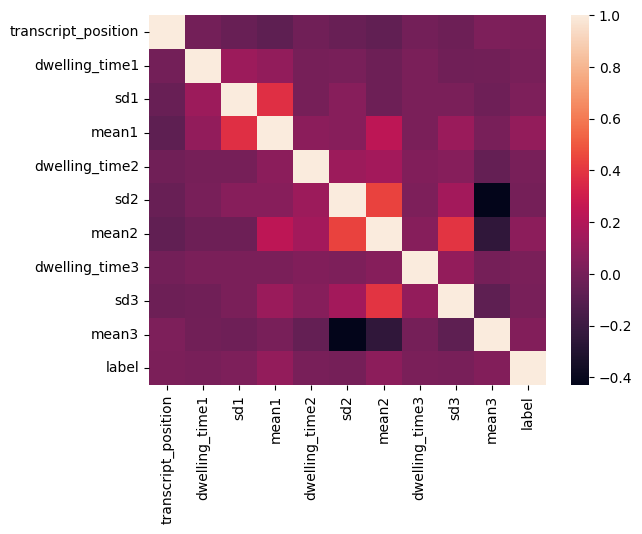

In [30]:
#Correlation plot

sns.heatmap(df.corr())

<AxesSubplot:>

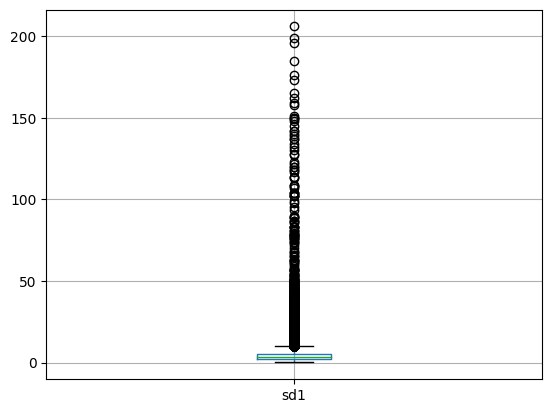

In [31]:
#Boxplot

df[['sd1']].boxplot()

<AxesSubplot:>

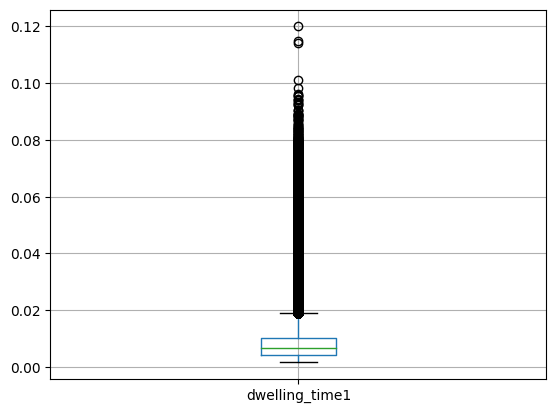

In [32]:
df[['dwelling_time1']].boxplot()

<AxesSubplot:>

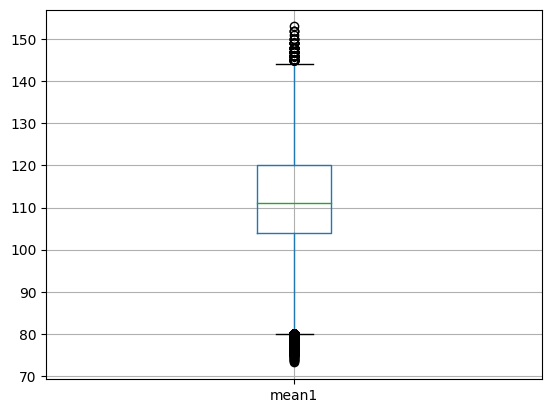

In [33]:
df[['mean1']].boxplot()

<AxesSubplot:>

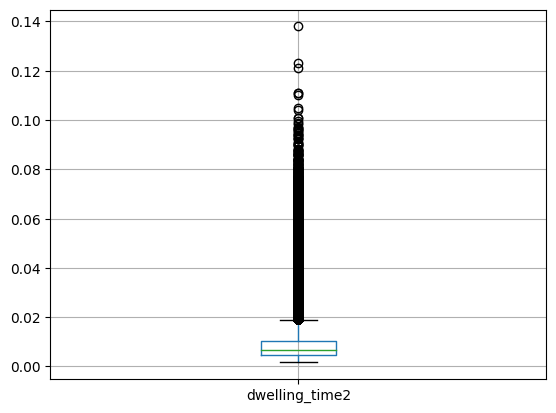

In [34]:
df[['dwelling_time2']].boxplot()

<AxesSubplot:>

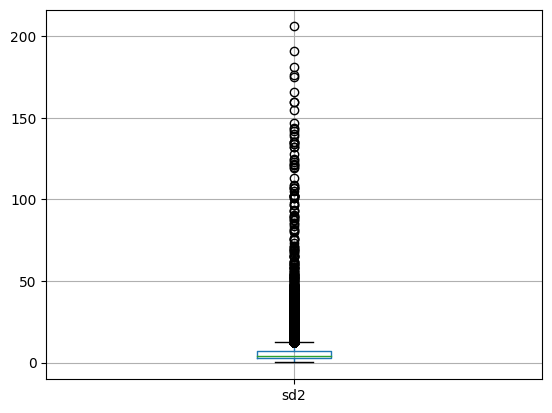

In [35]:
df[['sd2']].boxplot()

<AxesSubplot:>

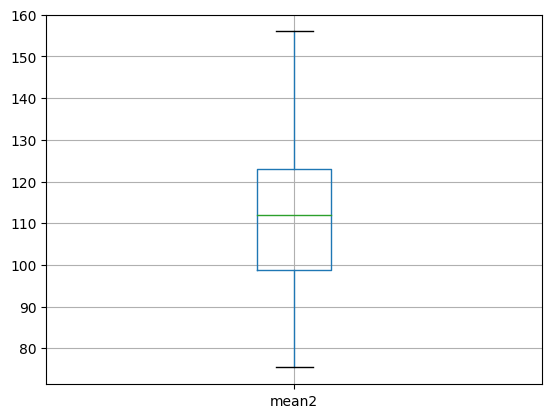

In [36]:
df[['mean2']].boxplot()

<AxesSubplot:>

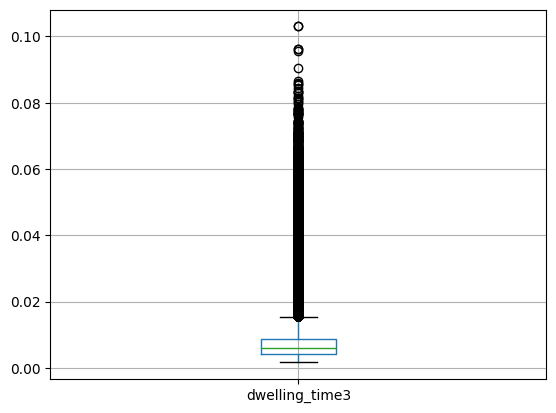

In [37]:
df[['dwelling_time3']].boxplot()

<AxesSubplot:>

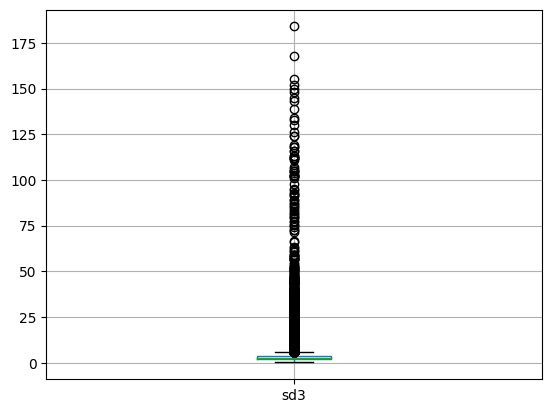

In [38]:
df[['sd3']].boxplot()

<AxesSubplot:>

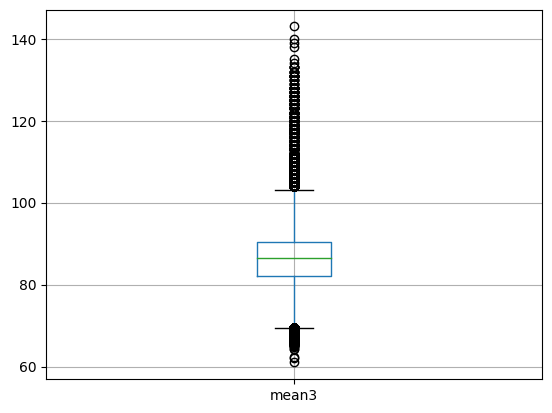

In [39]:
df[['mean3']].boxplot()